In [2]:
import pandas as pd
import numpy as np
import plotly.express as px 
import matplotlib.pyplot as plt
from datetime import datetime

C:\Users\vika1\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [11]:
df = pd.read_excel(r"D:\Users\vika1\Downloads\data.xlsx")
df.head()

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00


In [12]:
df.isna().sum()

client_id           6
sum                 6
status              0
sale                6
new/current         6
Unnamed: 5        730
document           21
receiving_date    123
dtype: int64

In [13]:
df.dtypes

client_id         float64
sum               float64
status             object
sale               object
new/current        object
Unnamed: 5        float64
document           object
receiving_date     object
dtype: object

In [17]:
def fix_date(date):
    time=[]
    for i in date:
        if isinstance(i, datetime):
            time.append(i)
        else:
            time.append(np.nan)
    return time

In [18]:
df.receiving_date=fix_date(df.receiving_date)

In [19]:
df.head()

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaT
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,NaT
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08


In [21]:
def set_month(pr_month):
    month=[]
    for i in pr_month:
        try:
            month.append(i.month)
        except:
            month.append(np.nan)
    return month

In [22]:
def set_year(pr_year):
    year=[]
    for i in pr_year:
        try:
            year.append(i.year)
        except:
            year.append(np.nan)
    return year

In [23]:
df['receiving_month']=set_month(df.receiving_date)
df['receiving_year']=set_year(df.receiving_date)

In [24]:
df.head()

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date,receiving_month,receiving_year
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,NaT,NaN,NaN
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26,7.0,2021.0
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08,6.0,2021.0
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08,6.0,2021.0


Вопросы:

1) Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных средств которых не просрочен.

In [54]:
df2 = df.query('status!="ПРОСРОЧЕНО" & receiving_year == 2021 & receiving_month == 7' )

In [55]:
df2 ['sum'].sum()

757830.7399999996

2) Как изменялась выручка компании за рассматриваемый период? Проиллюстрируйте графиком.

In [38]:
df['receiving_date'].min()

Timestamp('2021-05-18 00:00:00')

In [39]:
df['receiving_date'].max()

Timestamp('2021-11-15 00:00:00')

Мы рассматриваем только 2021 год с мая по ноябрь (5 и 11 месяцы), поэтому отсортируем по месяцу, так будет более наглядно

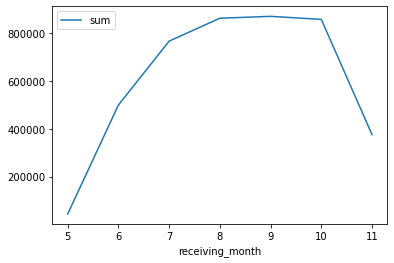

In [53]:
by_month = df.groupby('receiving_month').agg({'sum':'sum'}).plot()

Из графика видно, что выручка стабильно росла по сентябрь, далеее с октября по ноябрь выручка резко упала, однако это связано с тем, что конечная дата это 15 ноября, данные неполные

3) Кто из менеджеров привлек для компании больше всего денежных средств в сентябре 2021?

In [68]:
df3 = df.query('receiving_month == 9').groupby('sale').agg({'sum':'sum'})
df3.sort_values(by='sum')

,sum
sale,
Соколов,44234.60
Филимонова,45763.30
Васильев,55667.50
Кузнецова,60230.20
Андреев,124714.55
Смирнов,155245.90
Иванов,165314.80
Петрова,219240.12


Ответ: Петрова

4) Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?

In [87]:
df4 = df.query('receiving_month == 10')
df4.head()

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date,receiving_month,receiving_year
7,21.0,3613.7,ОПЛАЧЕНО,Кузнецова,текущая,NaN,оригинал,2021-10-13,10.0,2021.0
24,48.0,4452.7,ОПЛАЧЕНО,Петрова,текущая,NaN,оригинал,2021-10-08,10.0,2021.0
139,31.0,6523.7,ОПЛАЧЕНО,Филимонова,новая,NaN,оригинал,2021-10-12,10.0,2021.0
322,175.0,5328.7,ОПЛАЧЕНО,Андреев,текущая,NaN,оригинал,2021-10-04,10.0,2021.0
337,228.0,2193.7,ОПЛАЧЕНО,Смирнов,текущая,NaN,NaN,2021-10-06,10.0,2021.0


In [88]:
print(df4['new/current'].value_counts()['текущая'])

105


In [89]:
print(df4['new/current'].value_counts()['новая'])

17


Тип сделки "текущая" преобладал в октябре 2021 года

5) Сколько оригиналов договора по майским сделкам было получено в июне 2021?

In [91]:
df5 = df.query('document=="оригинал" & receiving_month == 6')
df5

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date,receiving_month,receiving_year
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08,6.0,2021.0
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08,6.0,2021.0
8,23.0,8511.7,ОПЛАЧЕНО,Андреев,текущая,NaN,оригинал,2021-06-08,6.0,2021.0
9,24.0,16347.7,ОПЛАЧЕНО,Андреев,новая,NaN,оригинал,2021-06-23,6.0,2021.0
10,28.0,10537.7,ОПЛАЧЕНО,Андреев,текущая,NaN,оригинал,2021-06-16,6.0,2021.0
...,...,...,...,...,...,...,...,...,...,...
120,266.0,3363.7,ОПЛАЧЕНО,Петрова,текущая,NaN,оригинал,2021-06-23,6.0,2021.0
121,270.0,5288.7,ОПЛАЧЕНО,Васильев,текущая,NaN,оригинал,2021-06-07,6.0,2021.0
122,273.0,10133.7,ОПЛАЧЕНО,Петрова,текущая,NaN,оригинал,2021-06-01,6.0,2021.0
123,274.0,26033.7,ОПЛАЧЕНО,Петрова,текущая,NaN,оригинал,2021-06-22,6.0,2021.0


Если сделка майская, а документы получены в июне, то, скорее всего, статус сделки не "новая", а "текущая".

In [92]:
print(df5['new/current'].value_counts()['текущая'])

72


Задание:

За каждую заключенную сделку менеджер получает бонус, который рассчитывается
следующим образом.
1) За новые сделки менеджер получает 7 % от суммы, при условии, что статус
оплаты «ОПЛАЧЕНО», а также имеется оригинал подписанного договора с
клиентом (в рассматриваемом месяце).

2) За текущие сделки менеджер получает 5 % от суммы, если она больше 10 тыс.,
и 3 % от суммы, если меньше. При этом статус оплаты может быть любым,
кроме «ПРОСРОЧЕНО», а также необходимо наличие оригинала подписанного
договора с клиентом (в рассматриваемом месяце).
Бонусы по сделкам, оригиналы для которых приходят позже рассматриваемого
месяца, считаются остатком на следующий период, который выплачивается по мере
прихода оригиналов. Вычислите остаток каждого из менеджеров на 01.07.2021.

In [101]:
def calculate_bonus(df):
    max_bonus = 0.07
    middle_bonus = 0.05
    low_bonus = 0.03
    
    if (df['new/current'] == 'новая') & (df.status == 'ОПЛАЧЕНО') & (df.document == 'оригинал'):
        return df['sum']*max_bonus
    
    if (df['new/current'] == 'текущая'):
        if (df.status != "ПРОСРОЧЕНО") & (df.document == 'оригинал'):
            if(df['sum'] > 10000):
                return df['sum']*middle_bonus
            else:
                return df['sum']*low_bonus
    return 0

In [105]:
df['sales_bonus'] = df.apply(calculate_bonus,axis=1)
df.head(10)

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date,receiving_month,receiving_year,sales_bonus
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaT,NaN,NaN,0.000
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,NaT,NaN,NaN,0.000
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26,7.0,2021.0,381.689
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08,6.0,2021.0,699.585
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08,6.0,2021.0,21.591
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-07-07,7.0,2021.0,127.611
6,20.0,5796.7,ОПЛАЧЕНО,Кузнецова,текущая,NaN,оригинал,2021-07-15,7.0,2021.0,173.901
7,21.0,3613.7,ОПЛАЧЕНО,Кузнецова,текущая,NaN,оригинал,2021-10-13,10.0,2021.0,108.411
8,23.0,8511.7,ОПЛАЧЕНО,Андреев,текущая,NaN,оригинал,2021-06-08,6.0,2021.0,255.351
9,24.0,16347.7,ОПЛАЧЕНО,Андреев,новая,NaN,оригинал,2021-06-23,6.0,2021.0,1144.339


In [106]:
df[df.receiving_date > '2021-07-01'].groupby('sale').agg({'sales_bonus' : 'sum'})

,sales_bonus
sale,
Андреев,26087.5263
Васильев,6934.5985
Иванов,22041.5960
Кузнецова,16108.7711
Михайлов,607.0680
Петрова,27753.6542
Селиванов,7102.4570
Смирнов,29932.3450
Соколов,3730.7090
